# Exploratory Analysis Functions for Environmental Data Clustering

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from matplotlib import colormaps

In [2]:
# Read in the data from the csv file
CO2Data = pd.read_csv("../Modelab-Python/data/Terminos_lagoon_TA_DIC_2023_RawData.csv")

## Set functions to be used later


In [3]:
def preprocess_data(df, variables):
    """
    Standardize selected variables and return clean DataFrame.
    """
    df_clean = df.dropna(subset=variables)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_clean[variables])
    return df_clean, X_scaled

In [4]:
def perform_hierarchical_clustering(X_scaled, method='ward', n_clusters=3):
    """
    Perform hierarchical clustering and return cluster labels.
    """
    linkage_matrix = linkage(X_scaled, method=method)
    cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')
    return linkage_matrix, cluster_labels

In [5]:
def plot_dendrogram(linkage_matrix, labels=None, n_clusters=3):
    """
    Plot a dendrogram from the hierarchical clustering with sample labels.
    Annotate the plot with the number of clusters.
    """
    # Generate cluster labels
    cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')

    plt.figure(figsize=(10, 5))
    dendrogram(
        linkage_matrix,
        labels=labels,
        above_threshold_color='gray'  # Default color for links above the threshold
    )
    plt.title(f'Hierarchical Clustering Dendrogram\n(Number of Clusters: {n_clusters})')
    plt.xlabel('Sample Labels')
    plt.ylabel('Distance')
    plt.tight_layout()
    plt.show()

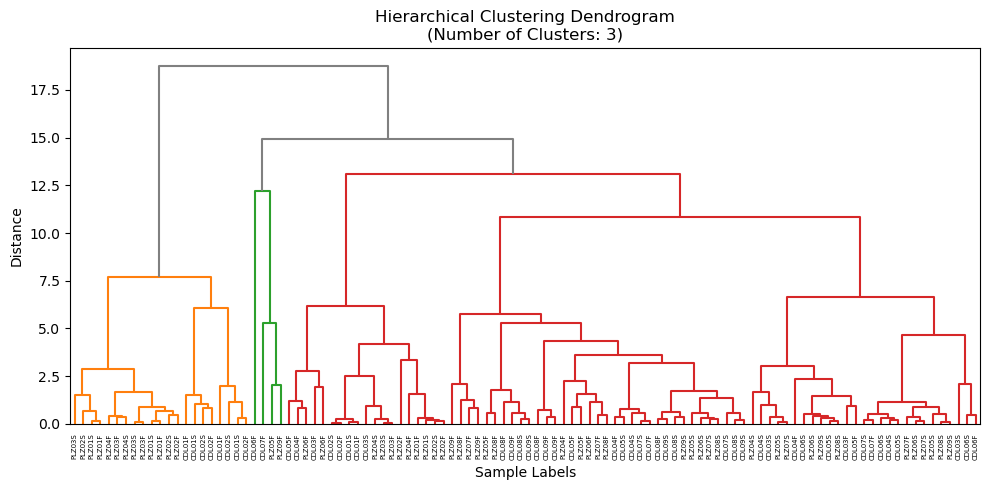

In [6]:
# Main workflow

# Select variables for clustering
selected_vars = ['dic_micromol_kg', 'ta_micromol_kg', 'sal_psu', 'temp_c', 'do_mg_l', 'chlorophy_microg_l','turbidity_fnu']

# Preprocess the data;  Drop rows with missing values in selected variables
# Standardize the selected variables using StandardScaler
df_clean, X_scaled = preprocess_data(CO2Data, selected_vars)

# Perform hierarchical clustering sing thue 'ward' method 
# The number of clusters to be 3,  You can adjust the number of clusters as needed
linkage_matrix, clusters = perform_hierarchical_clustering(X_scaled, n_clusters=3)
 
# Add cluster labels to the DataFrame
df_clean['cluster'] = clusters

# Plot dendrogram using sample labels 
plot_dendrogram(linkage_matrix, labels=df_clean['sample'].values)

## Exercises:

- Change the number of clusters to 4 and plot the dendrogram again.

In [10]:
def plot_dendrogram(linkage_matrix, labels=None, n_clusters=4):
    """
    Plot a dendrogram from the hierarchical clustering with sample labels.
    Annotate the plot with the number of clusters using a horizontal cut line.
    """
    # Generate cluster labels (not strictly needed here, but you may use them later)
    cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')

    plt.figure(figsize=(10, 5))
    dendrogram(
        linkage_matrix,
        labels=labels,
        above_threshold_color='gray'
    )

    # Add a horizontal line showing the cut to form clusters
    # The threshold is determined by the distance at which we cut
    # Extract the distance value to draw a line at the correct height
    last = linkage_matrix[-n_clusters + 1, 2]  # height for n_clusters
    plt.axhline(y=last, color='red', linestyle='--', label=f'{n_clusters} clusters')

    plt.title(f'Hierarchical Clustering Dendrogram\n(Number of Clusters: {n_clusters})')
    plt.xlabel('Sample Labels')
    plt.ylabel('Distance')
    plt.legend()
    plt.tight_layout()
    plt.show()

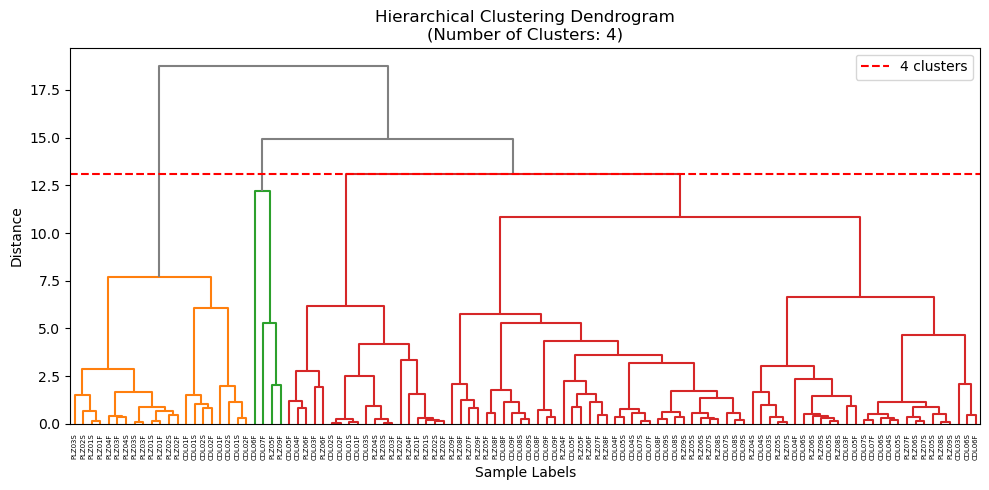

In [11]:
# Main workflow

# Select variables for clustering
selected_vars = ['dic_micromol_kg', 'ta_micromol_kg', 'sal_psu', 'temp_c', 'do_mg_l', 'chlorophy_microg_l','turbidity_fnu']

# Preprocess the data;  Drop rows with missing values in selected variables
# Standardize the selected variables using StandardScaler
df_clean, X_scaled = preprocess_data(CO2Data, selected_vars)

# Perform hierarchical clustering sing thue 'ward' method 
# The number of clusters to be 4,  You can adjust the number of clusters as needed
linkage_matrix, clusters = perform_hierarchical_clustering(X_scaled, n_clusters=4)
 
# Add cluster labels to the DataFrame
df_clean['cluster'] = clusters

# Plot dendrogram using sample labels 
plot_dendrogram(linkage_matrix, labels=df_clean['sample'].values)

- Try different hierarchical clustering methods such as 'single,' 'complete,' or 'average' and observe the differences in the dendrograms. Use the hierarchy documentation: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

In [16]:
# Step 1: Change your clustering function to accept the method
def perform_hierarchical_clustering(X, n_clusters=4, method='ward'):
    """
    Perform hierarchical clustering and return the linkage matrix and cluster labels.
    method: 'ward', 'single', 'complete', 'average', etc.
    """
    linkage_matrix = linkage(X, method=method)
    clusters = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')
    return linkage_matrix, clusters

In [14]:
#Step 2: Add the method to the dendrogram title
def plot_dendrogram(linkage_matrix, labels=None, n_clusters=4, method='ward'):
    """
    Plot a dendrogram from the hierarchical clustering with sample labels.
    Annotate the plot with the number of clusters using a horizontal cut line.
    """
    # Generate cluster labels (not strictly needed here, but you may use them later)
    cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')

    plt.figure(figsize=(10, 5))
    dendrogram(
        linkage_matrix,
        labels=labels,
        above_threshold_color='gray'
    )

    # Add a horizontal line showing the cut to form clusters
    # The threshold is determined by the distance at which we cut
    # Extract the distance value to draw a line at the correct height
    last = linkage_matrix[-n_clusters + 1, 2]  # height for n_clusters
    plt.axhline(y=last, color='red', linestyle='--', label=f'{n_clusters} clusters')
    
    plt.title(f'Hierarchical Clustering Dendrogram ({method} linkage) - {n_clusters} clusters')
    plt.xlabel('Sample Labels')
    plt.ylabel('Distance')
    plt.legend()
    plt.tight_layout()
    plt.show()


Method: ward


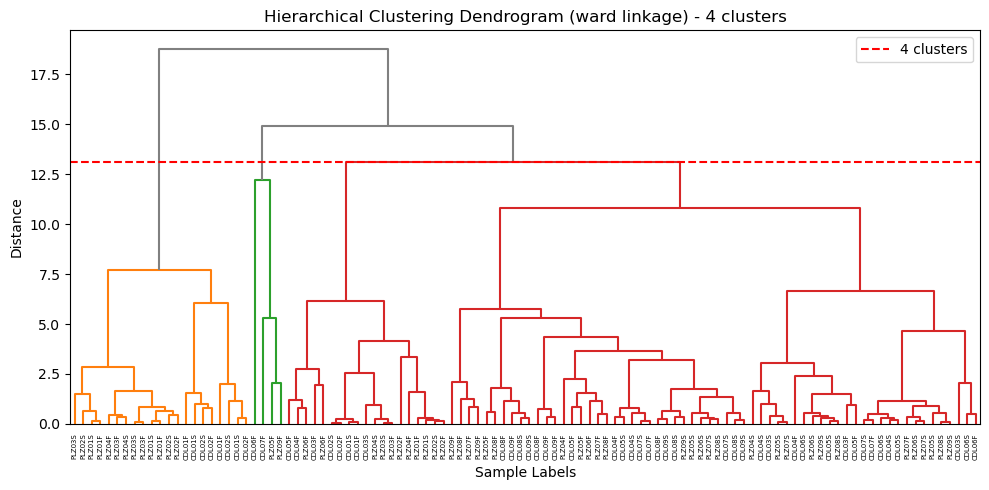


Method: single


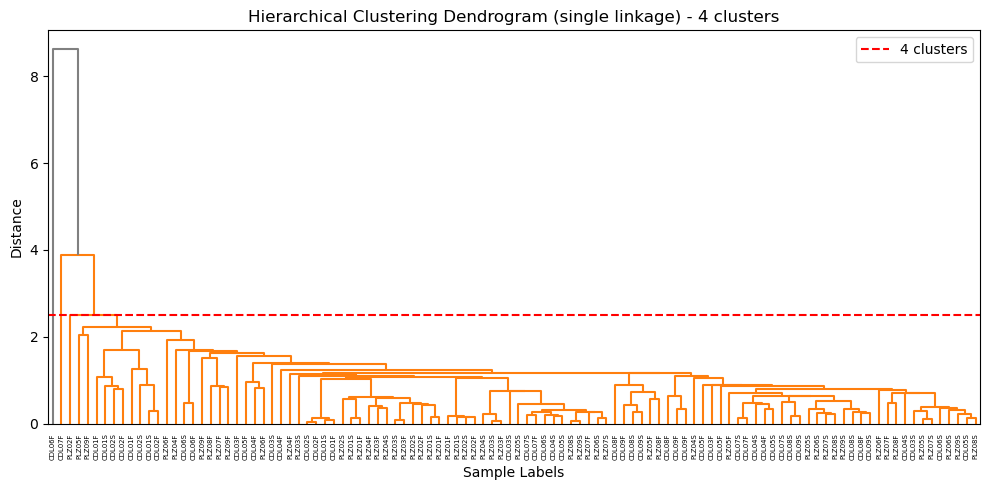


Method: complete


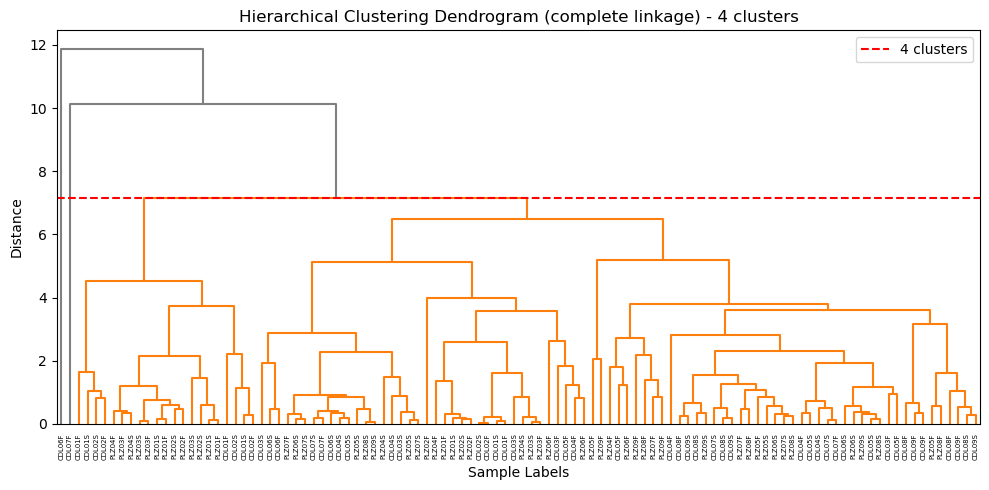


Method: average


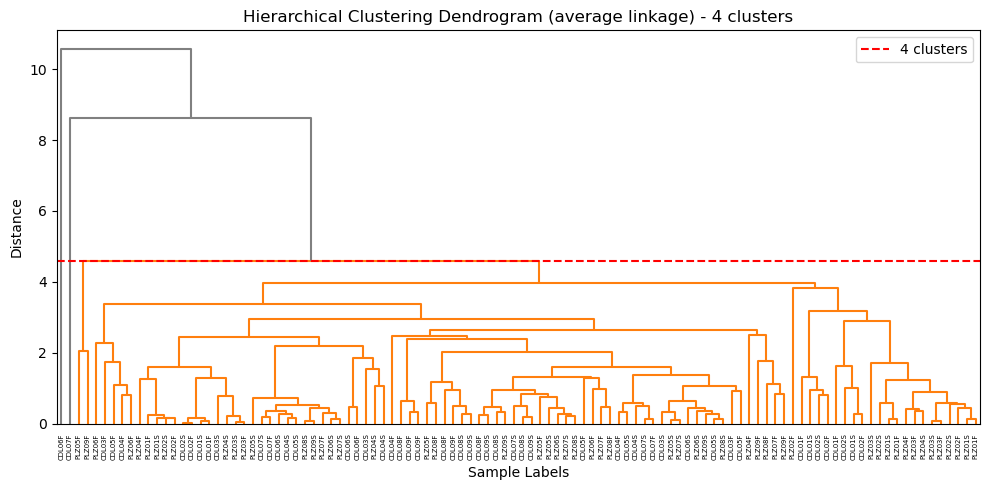

In [17]:
#Step 3: Main workflow

# Diccionario para almacenar resultados
clustering_results = {}

methods = ['ward', 'single', 'complete', 'average']

for method in methods:
    print(f"\nMethod: {method}")
    
    # Clustering
    linkage_matrix, clusters = perform_hierarchical_clustering(X_scaled, n_clusters=4, method=method)
    
    # Guardar los clusters en una copia del DataFrame limpio
    df_with_clusters = df_clean.copy()
    df_with_clusters[f'cluster_{method}'] = clusters

    # Guardar resultados en el diccionario
    clustering_results[method] = {
        'linkage_matrix': linkage_matrix,
        'clusters': clusters,
        'df': df_with_clusters
    }

    # Dendrograma
    plot_dendrogram(linkage_matrix, labels=df_clean['sample'].values, n_clusters=4, method=method)

Visually compare how the hierarchical structures change:

- 'single': tends to produce long chains and is sensitive to outliers.

- 'complete': forms more compact groups.

- 'average': balanced between the previous two.

- 'ward': tends to create clusters with minimal variance (more uniform).

In [19]:
# Comparison of clusters between methods
pd.DataFrame({
    'ward': clustering_results['ward']['clusters'],
    'single': clustering_results['single']['clusters'],
    'complete': clustering_results['complete']['clusters'],
    'average': clustering_results['average']['clusters'],
}).head()

,ward,single,complete,average
0,1,1,1,2
1,1,1,1,2
2,1,1,1,2
3,1,1,1,2
4,4,1,2,2
